# Part 5 - Image Dimension Reduction


**Some Ideas before I proceed**

Raw image data contains tuples, which consist of pixel data for each individual pixel in terms of Red, Green, Blue. The dimensions are manifested as the number of pixels within the data. So, basically reducing the features means reducing the pixel information, by eliminating a few pixels whose data might be redundant by reducing the dimensions.That means compression of the pixel data.

This can be achieved by using the appropriate clustering techniques where the pixel data corresponding to that particular group can be substituted by its means.
It can be started by taking the ratio of the image canvas size and considering it as a single matrix.

Suppose if we have 1920x1080 as the image size, then we by our consideration we have a matrix of the size 1920x1080. Then the ratio of 430x270 can be taken as a submatrix and thus can be dealt with in itself. There are 4 such matrices within the given matrix.

Each such 430x270 matrix can be substituted with 10 matrices each of the size 43x27. Each such 43x27 matrix can be considered as a cluster and can be substituted using cluster mean of that particular matrix. So we will have 40x40 dimensional matrix, with 40 matrices each representing one particular cluster.
Video is nothing but a sequence of images. 

Hence all that can be applied to the images can be applied to videos too. But, video also has additional dimension of no of images per second. Hence, it has an extra dimension -an outside dimension - for how fast the images are rolling by or refreshed.

**Please Note**
In this particular project video is not taken because of time constraints, but a half demonstration of how a 360x640 image can be compressed into 40x40 image using Mean value of the pixels.
We can go more detailed analysis using clustering technniques, but because of time constraints in this project that is not being dealt with, also to keep the approach as simple as possible.

uint8
(360, 640, 3)
[[[170 187 203]
  [170 187 203]
  [170 187 203]
  ...
  [141 165 193]
  [141 165 193]
  [141 165 193]]

 [[170 187 203]
  [170 187 203]
  [170 187 203]
  ...
  [141 165 193]
  [141 165 193]
  [141 165 193]]

 [[170 187 203]
  [170 187 203]
  [170 187 203]
  ...
  [141 165 193]
  [141 165 193]
  [141 165 193]]

 ...

 [[ 85  95 104]
  [ 75  85  94]
  [ 81  91 100]
  ...
  [ 64  79 100]
  [ 60  75  96]
  [ 62  77  98]]

 [[ 72  82  91]
  [ 60  70  79]
  [ 51  61  70]
  ...
  [ 61  76  97]
  [ 58  73  94]
  [ 53  68  91]]

 [[ 31  41  51]
  [ 33  43  53]
  [ 29  39  49]
  ...
  [ 55  70  91]
  [ 46  61  84]
  [ 36  51  74]]]


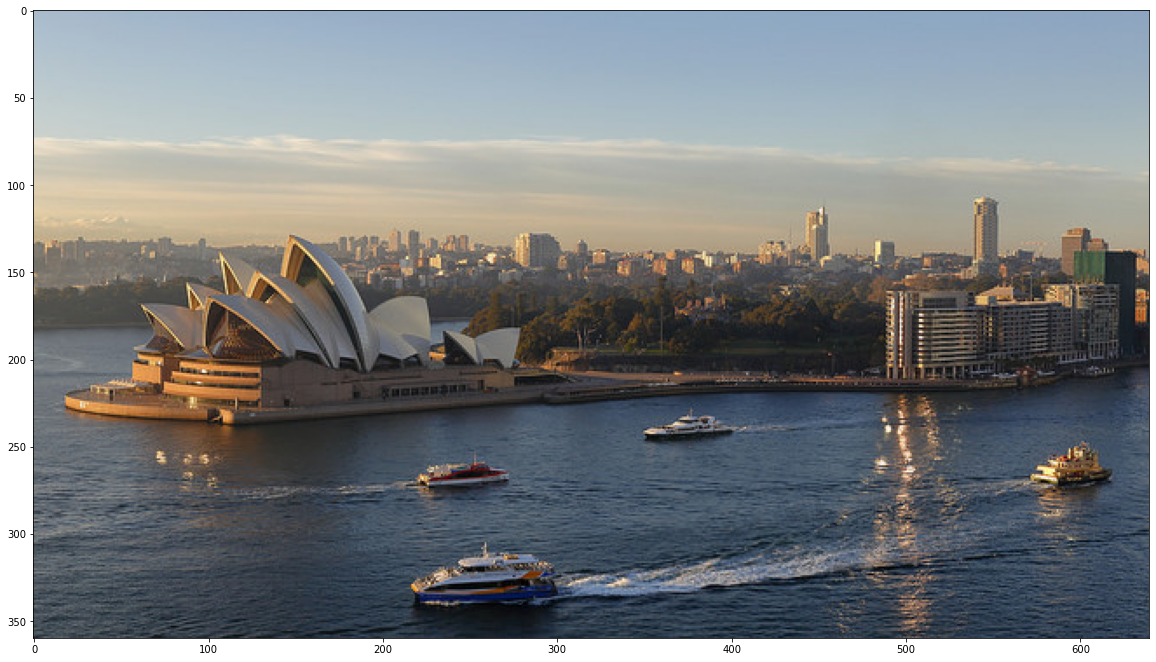

In [1]:
# load and display an image with Matplotlib
import numpy as np

from matplotlib import image
from matplotlib import pyplot
# load and show an image with Pillow
from PIL import Image
# load image as pixel array

data = image.imread('Sydney-Opera-House.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
print(data)
# display the array of pixels as an image
pyplot.figure(figsize=(20,12))
pyplot.imshow(data)
pyplot.show()


In [2]:
data.shape

(360, 640, 3)

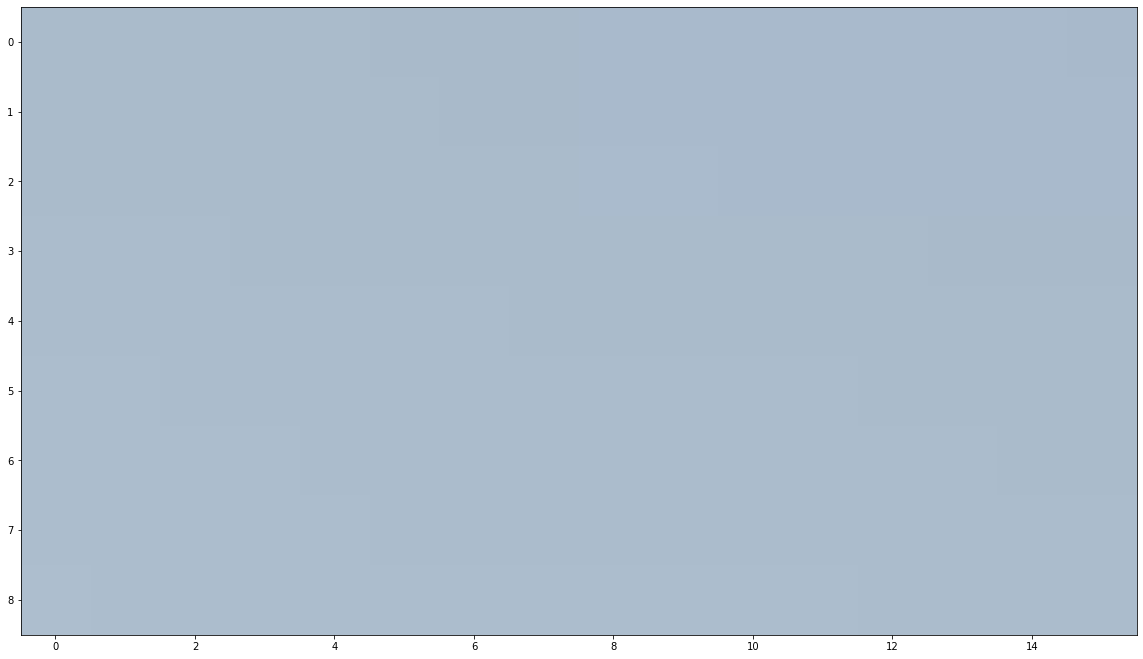

In [3]:
#Demonstration of how a pixel box can be generated from the whole pixel array of master figure.
pixel_box=data[:9,:16]
pyplot.figure(figsize=(20,12))
pyplot.imshow(pixel_box)
pyplot.show()

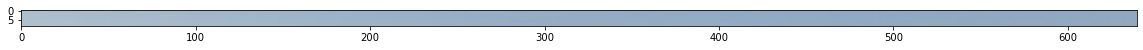

In [4]:
#How a single line can be separated from the given pixels
line2=data[9:18]
pyplot.figure(figsize=(20,12))
pyplot.imshow(line2)
pyplot.show()

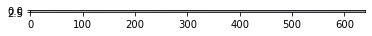

In [5]:
#showing a small pixel array of the above figure.
pyplot.imshow(line2[:4][:3])
pyplot.show()

In [6]:
#And the corresponding pixel data of the above figure.
line2[:4][:15]

array([[[173, 190, 206],
        [173, 190, 206],
        [173, 190, 206],
        ...,
        [143, 167, 191],
        [143, 167, 191],
        [143, 167, 191]],

       [[174, 191, 207],
        [174, 191, 207],
        [174, 191, 207],
        ...,
        [143, 167, 191],
        [143, 167, 191],
        [143, 167, 191]],

       [[174, 191, 207],
        [174, 191, 207],
        [174, 191, 207],
        ...,
        [143, 167, 191],
        [143, 167, 191],
        [143, 167, 191]],

       [[174, 192, 206],
        [174, 192, 206],
        [174, 192, 206],
        ...,
        [145, 167, 191],
        [145, 167, 191],
        [145, 167, 191]]], dtype=uint8)

In [7]:
image_data=[] # This contains the image data as pixellated data with reduced dimensions.
pixel_box=[]
for rows in range(0,360+1,9):
    if rows+9>361:
        break
    offset_cols=0
    for columns in range(0,640+1,16):
        offset_cols=columns
        temp=list(data[rows:rows+9])
        count=0
        #print(temp)
        tools=[]
        #print(offset_cols)
        for line in range(0,9):
            #print(line)
            #print(temp[line])
            tools.append(temp[line][offset_cols:offset_cols+16])
        pixel_box.append(tools)
    image_data.append(pixel_box)
    pixel_box=[]

In [8]:
#Showing the original data collapsed into a 40x41 pixel boxes for taking the mean value
np.array(image_data).shape

<ipython-input-8-197e595feb00>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(image_data).shape


(40, 41, 9)

In [9]:
#Each individual pixel box generated thus has the dimensions as given below. For our sake we are going to fix it and keep it static.
np.array(image_data[10][12]).shape

(9, 16, 3)

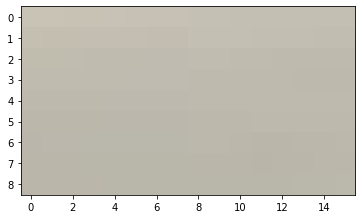

In [10]:
#Actual display of the pixel box.
pyplot.imshow(np.array(image_data[10][12]))
pyplot.show()

In the above case, we have divided the whole picture into small pixel boxes of dimensions (9x16) such that each pixel is a kind of zoomed in version of the whole picture. By controlling the factor i.e. the amount of compression we want to achieve, we can decide the dimension of the pixel box and thus also reduce the dimensions of the picture pretty easily.

The above represents one single pixel box. Now, we can explore the dimensions of those pixel boxes i.e. how the RGB colors and distributed and then depending on the situation, we can go ahead with subsitution.

If we observe carefully, the color seems to be very uniform or something similar. We can simply subsitute the mean value of each individual color for the whole pixel box and substitute it. What follows is what demonstrates it.

In [11]:
whole_image=[] #Whole reduced dimensional image.
pixel_array=[] #Array of pixels where dimensionally reduced image is stored
pixel_modified=[] #reduced pixel here.
pixel_b=np.array(image_data[10][12]) #taking individual pixel box from the above figure.

print("Red value of the pixel :",pixel_b[0][0][0])
print("Green value of the pixel :",pixel_b[0][0][1])
print("Blue value of the pixel :",pixel_b[0][0][2])
#indicates the color value of one pixel in the picture matrix we have taken.



Red value of the pixel : 201
Green value of the pixel : 195
Blue value of the pixel : 181


In [12]:
#We are fixing this here.

no_of_rows=9
no_of_cols=16
total_pixels=no_of_rows*no_of_cols
R_sum=0
G_sum=0
B_sum=0
for i in range(no_of_rows):
    for j in range(no_of_cols):
        R_sum+=pixel_b[i][j][0] #Red Pixel total
        G_sum+=pixel_b[i][j][1] # Green Pixel total
        B_sum+=pixel_b[i][j][2] # Blue Pixel Total

R_avg=int(R_sum/total_pixels)
G_avg=int(G_sum/total_pixels)
B_avg=int(B_sum/total_pixels)       

pixel_array.append([R_avg,G_avg,B_avg]) #This replaces pixel box with its average value of Red, Green and Blue pixel values.

In [13]:
#This is the pixel value that is going to replace the pixel box 
pixel_array

[[189, 186, 173]]

Making this into a function and passing each pixel box as input we will get a pixel array as an output. When can they finally put them all together to replace the picture.

In [14]:



#########################################################
#########################################################

#########################################################

#############################################################
##############################################################3

def modified_image(image_data_supplied):
    new_image=[]
    for ind1 in range(39):
        pix_box_upload=[]
        for ind2 in range(40):
            #print(ind1,ind2)
            pix_box=image_data_supplied[ind1][ind2]
            #pyplot.imshow(np.array(image_data_supplied[ind1][ind2]))
            #pyplot.show()
            #print(pix_box)
            pix_box_upload.append(pixel_avg_out(no_of_rows=9,no_of_cols=16,pixel_b=pix_box))
        new_image.append(np.array(pix_box_upload))
    return new_image
        

        

#########################################################
#########################################################

#########################################################

#############################################################
##############################################################3


def pixel_avg_out(no_of_rows,no_of_cols,pixel_b):
    R_sum=0
    G_sum=0
    B_sum=0
    total_pixels=no_of_rows*no_of_cols
    for i in range(no_of_rows):
        for j in range(no_of_cols):
            #print(i,j)
            R_sum+=pixel_b[i][j][0] #Red Pixel total
            G_sum+=pixel_b[i][j][1] # Green Pixel total
            B_sum+=pixel_b[i][j][2] # Blue Pixel Total

    R_avg=int(R_sum/total_pixels)
    G_avg=int(G_sum/total_pixels)
    B_avg=int(B_sum/total_pixels)
    return [R_avg,G_avg,B_avg]
            
            
#########################################################
#########################################################

#########################################################

#############################################################
##############################################################3
          
            
        
        

In [15]:
k=modified_image(image_data)


In [16]:
np.array(k).shape

(39, 40, 3)

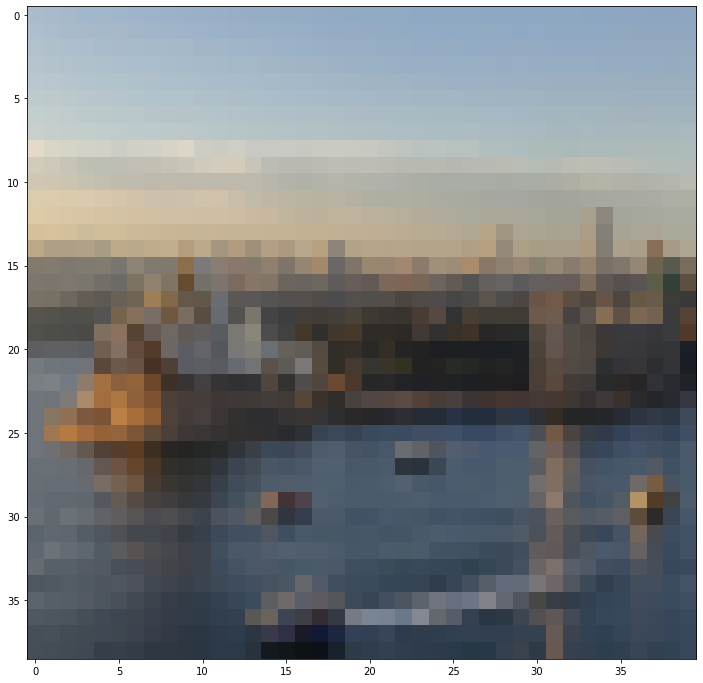

In [17]:
pyplot.figure(figsize=(20,12))
pyplot.imshow(np.array(k))
pyplot.show()

**Request**:
You can see the pixellation of the data here, we can simply reduce the pixellation with proper analysis, and increasing the number of dimensions. I am leaving it as it is. However, further strategies on how to deal with data are discussed but are not implemented.

**Strategies to deal with arbitrary sizes and ratios***
1. Make a submatrix of the pixels just like the one done above. The submatrix will be let us say mxn dimensions, while the original was ixj dimensions.
2. Train a model like PCA that would reduce the number of dimensions based on the importance of the pixel data and then transform the higher dimensional matrix into lower dimensional matrix using those new PCA columns.
3. Realigning the pixels to present the data as it is.

We can do the same with videos too.